7/28/25

Text extractor & chunker (chunker.py):

In [11]:
from PyPDF2 import PdfReader

all_text = []

with open("user-manual.pdf", "rb") as f:
    reader = PdfReader(f)
    for i, page in enumerate(reader.pages):
        text = page.extract_text()
        if text:
            all_text.append(text)
        else:
            print(f"No text found on page {i}")

full_text = "\n\n".join(all_text)

words = full_text.split()
chunk_size = 250
chunks = []
for i in range(0, len(words), chunk_size):
    chunk = " ".join(words[i:i + chunk_size])
    chunks.append(chunk)

print(f"Total chunks created: {len(chunks)}")
print("\n--- First chunk preview ---\n")
print(chunks[0][:500])

import pickle

with open("text_chunks.pkl", "wb") as f:
        pickle.dump(chunks, f)


No text found on page 1
No text found on page 7
No text found on page 11
No text found on page 47
No text found on page 55
No text found on page 63
No text found on page 75
No text found on page 83
No text found on page 93
No text found on page 101
No text found on page 109
No text found on page 119
Total chunks created: 168

--- First chunk preview ---

NVIDIA Bright Cluster Manager 9.2 User Manual Revision: 79c0f2bc9 Date: Fri Jun 27 2025 Table of Contents Table of Contents . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . i 0.1 About This Manual . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . v 0.2 Getting User-Level Support . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . v 1 Introduction 1 1.1 What Is A Beowulf Cluster? . . . . . . . . . . . . .


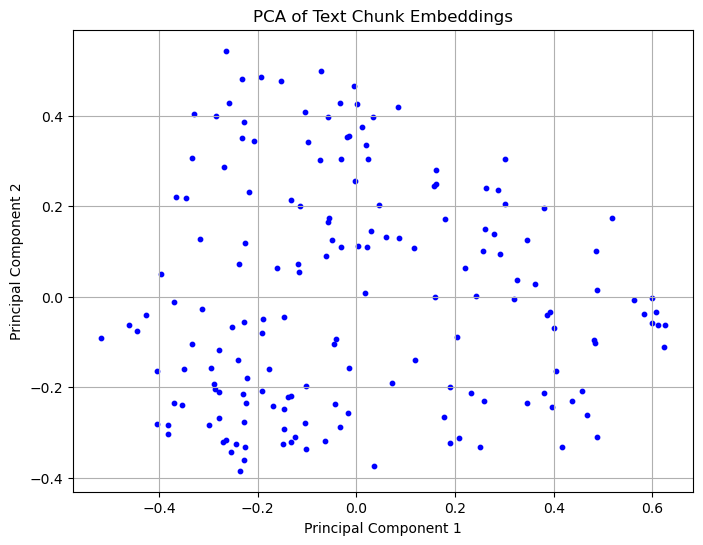

In [14]:
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

with open("embedding.pkl", "rb") as f:
    embeddings = pickle.load(f)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=10, color='blue')
plt.title("PCA of Text Chunk Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Vector database builder (build_vector_db.py):

In [13]:
import pickle
import faiss
import numpy as np

with open("embedding.pkl", "rb") as f:
        embeddings = pickle.load(f)

embedding_matrix = np.array(embeddings).astype("float32")

dimension = embedding_matrix.shape[1]
index = faiss.IndexFlatL2(dimension)

index.add(embedding_matrix)

faiss.write_index(index, "faiss_index.idx")

print(f"Indexed {index.ntotal} vectors of dimension {dimension}")

Indexed 168 vectors of dimension 384


Summary:

I started off by forming the file "chunker.py", which would utilize the PdfReader of PyPDF2 to extract the text from "user-manual.pdf" from NVIDIA Docs. "chunker.py" conjoined all the extraced text into a single string, followed by the string's chunking into 168 chunks, each composed of 250 words. "chunker.py" would finish out by generating "text_chunks.pkl", which would be utilized by "embed_chunks.py" shortly after.

Utilizing "text_chunks.pkl", "embed_chunks.py" would employ a sentence trasformer to embed the 168 text chunks, and save them in a file called "embedding.pkl".

"build_vector_db.py" was created to officially generate the vector database from the .pkl file containing the text chunk embeddings in a file named "faiss_index.idx".

This newly created .idx file will soon be used to create a RAG pipeline, which will be able to call upon certain requested information, returning the most relevant text embedded from the original user-manual file.

Next Goal:

I will attempt to chunk and embed text from different NVIDIA documents to create RAG pipelines for each NVIDIA manual. I will experiment with different methods of text extraction, chunking, etc. along the way as a means of fine-tuning. Then, I will begin the formation of a general NVIDIA Bright Cluster RAG pipeline, which will encompass information from every relevant manual on the site.